### Cargar liberías 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

### Cargar datos y generar DF

In [6]:
df = pd.DataFrame(pd.read_csv('df.csv'))
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spend
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,...,0,0,0,0,3,11,1,67,0,1617
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,...,0,0,0,0,3,11,0,70,2,27
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,3,11,0,59,0,776
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,...,0,0,0,0,3,11,0,40,1,53
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,3,11,0,43,1,422


### Preparación de los datos

In [7]:
# Llenamos los valores nulos de income con la media 
df['Income'].fillna(df['Income'].median(), inplace=True)

# Matriz de caracteristicas
X = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
        'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age', 'Total_Children', 'Total_Spend']]

# Variable objetivo
y = df['Response']

# Conjunto de entramiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\HOME\AppData\Local\Temp\ipykernel_17672\225020510.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


### MLP y Arquitectura

In [8]:
# Definimos el modelo MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Agregamos early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

c:\Users\HOME\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HOME\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7479 - loss: 1.4569 - val_accuracy: 0.8549 - val_loss: 1.1309
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8555 - loss: 1.1159 - val_accuracy: 0.8728 - val_loss: 0.9132
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8656 - loss: 0.8978 - val_accuracy: 0.8661 - val_loss: 0.7629
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8582 - loss: 0.7782 - val_accuracy: 0.8705 - val_loss: 0.6561
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8723 - loss: 0.6496 - val_accuracy: 0.8750 - val_loss: 0.5780
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8719 - loss: 0.5810 - val_accuracy: 0.8638 - val_loss: 0.5231
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8885 - loss: 0.4901 - val_accuracy: 0.8661 - val_loss: 0.4768
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8823 - loss: 0.4590 - val_accuracy: 0.8661 -

### Evaluación del modelo

In [9]:
# Predecimos con el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Imprimimos métricas de evaluación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       381
           1       0.69      0.30      0.42        67

    accuracy                           0.88       448
   macro avg       0.79      0.64      0.67       448
weighted avg       0.86      0.88      0.85       448

[[372   9]
 [ 47  20]]


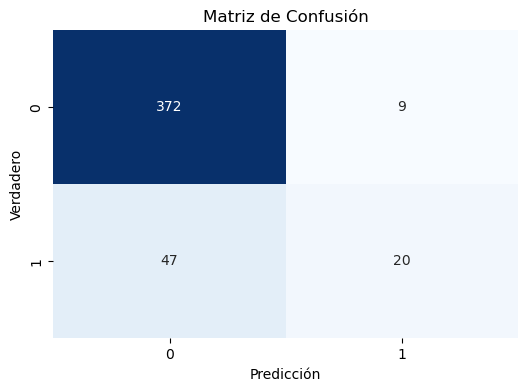

In [12]:
# Crear un heatmap con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

### Curvas de aprendizaje

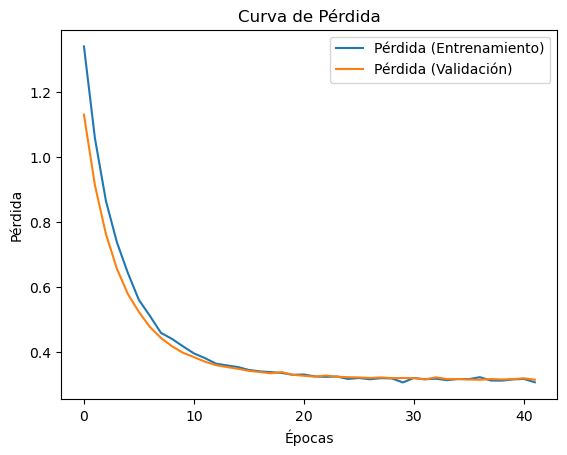

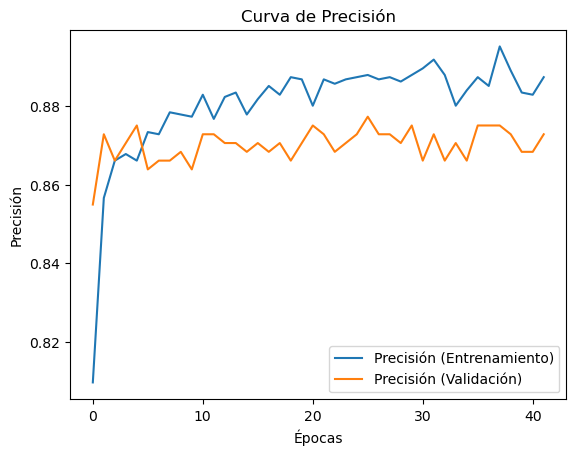

In [10]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (Validación)')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()